# Titanic
듀토리얼에서 타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델을 생성할 것이다.
## Exploratory data analysis, visualization, machine learning

- 변수 알아보기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('seaborn')  
sns.set(font_scale=2.5)  #plot의 사이즈 2.5

import missingno as msno  #데이터셋의 채워지지 않은 null data

#ignore warnings
import warnings  
warnings.filterwarnings('ignore') #warning 무시하기

%matplotlib inline

> 라이브러리를 불러온다

## 1. Dataset 확인

In [2]:
filepath = os.getenv('HOME')+'/aiffel/Kaggle/Titanic/' 
df_train=pd.read_csv('./train.csv')
df_test=pd.read_csv('./test.csv')

> 파일 경로를 지정해주고 train/test 파일을 불러온다.

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> 우리가 다루는 문제에서 feature는 Pclass,Age,SibSp, Parch, Fare 이며, 예측하려는 target label 은 Survived 입니다.

- PassengerId
- Pclass
- Name
- Sex
- Age
- SibSp
- Parch
- Ticket
- Fare
- Cabin
- Embarked

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


pandas dataframe 에는 describe() 메소드가 있는데, 이를 쓰면 각 feature가 가진 통계치들을 반환해준다.

- count : 
- mean : 평균
- std : 표준편차
- min : 최솟값
- 25% : 1사분위수
- 50% : 2사분위수
- 75% : 3사분위수
- max : 최댓값

In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.1 Null data check

In [6]:
for col in df_train.columns:
    msg =  'colunm: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

colunm: PassengerId	 Percent of NaN value: 0.00%
colunm:   Survived	 Percent of NaN value: 0.00%
colunm:     Pclass	 Percent of NaN value: 0.00%
colunm:       Name	 Percent of NaN value: 0.00%
colunm:        Sex	 Percent of NaN value: 0.00%
colunm:        Age	 Percent of NaN value: 19.87%
colunm:      SibSp	 Percent of NaN value: 0.00%
colunm:      Parch	 Percent of NaN value: 0.00%
colunm:     Ticket	 Percent of NaN value: 0.00%
colunm:       Fare	 Percent of NaN value: 0.00%
colunm:      Cabin	 Percent of NaN value: 77.10%
colunm:   Embarked	 Percent of NaN value: 0.22%


- 이스케이프 코드
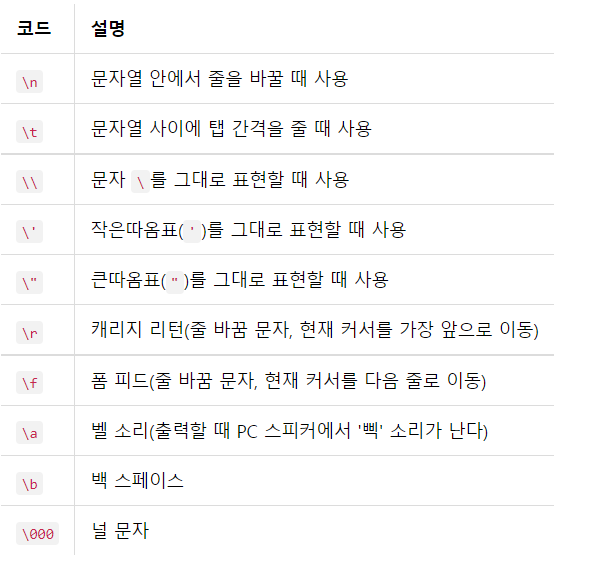

- {:>10} : 왼쪽 정렬
- {:.2f}%

In [7]:
for col in df_test.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 20.57%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.24%
column :      Cabin	 Percent of NaN value: 78.23%
column :   Embarked	 Percent of NaN value: 0.00%


In [8]:
df_test[col].shape[0]

418

In [9]:
df_test[col]

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

- 

<AxesSubplot:>

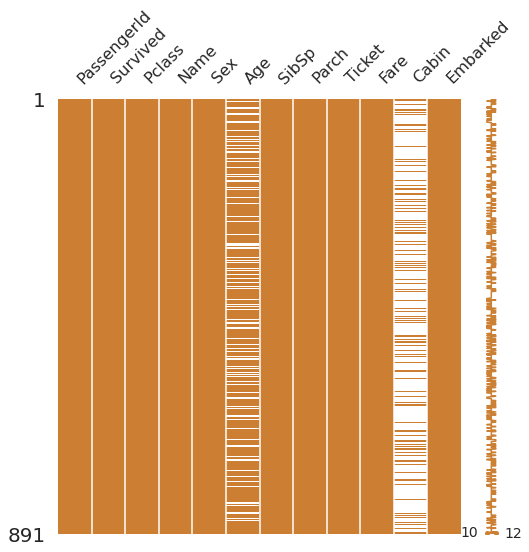

In [10]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

> MSNO 라는 라이브러리를 사용하면 null data의 존재를 쉽게 볼 수 있다.

<AxesSubplot:>

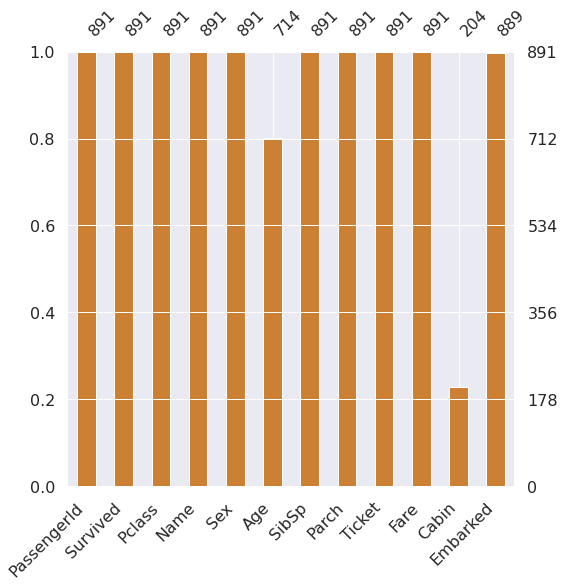

In [11]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

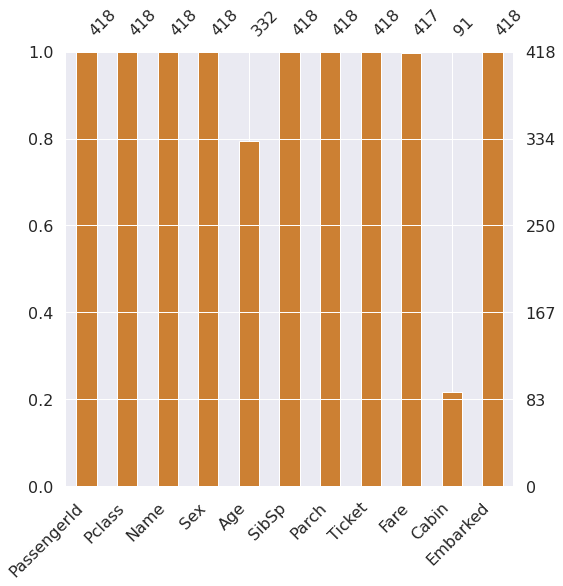

In [12]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

## 1.2 Target label 확인
- target label이 어떤 distribution 을 가지고 있는지 확인해봐야 합니다.
- 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있다.

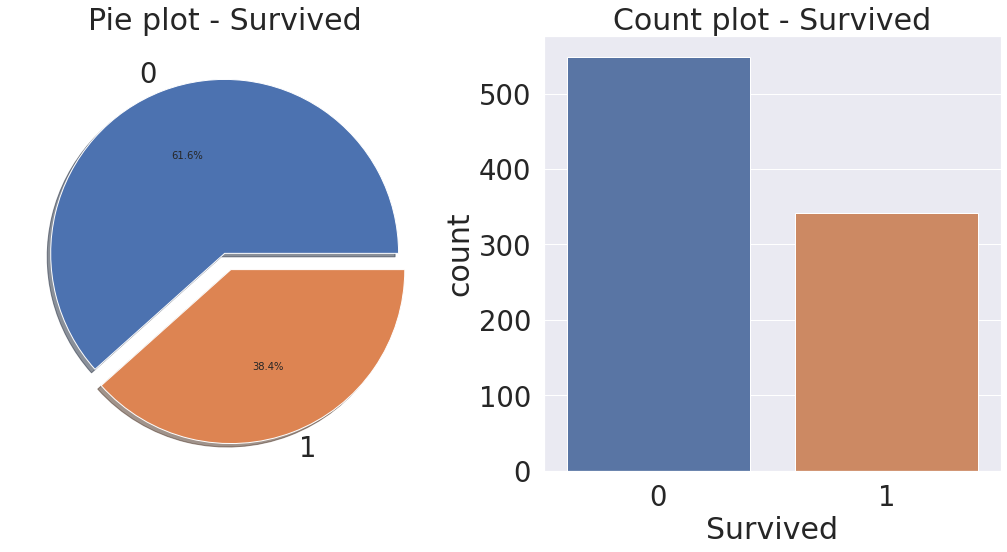

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))  #(1,2)의 plot을 나타내겠다./#행길이-18,열길이-8

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('') #y레이블을 없앰
sns.countplot('Survived', data=df_train, ax=ax[1]) #count로 해준 plot
ax[1].set_title('Count plot - Survived')

plt.show()

In [14]:
df_train['Survived'].value_counts()  #각 레이블 값의 개수

0    549
1    342
Name: Survived, dtype: int64

In [15]:
type(df_train['Survived'].value_counts())  #series들은 plot을 가지고 있다.

pandas.core.series.Series

<AxesSubplot:ylabel='Survived'>

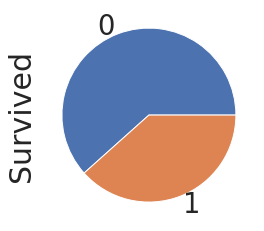

In [16]:
df_train['Survived'].value_counts().plot.pie()

<AxesSubplot:ylabel='Survived'>

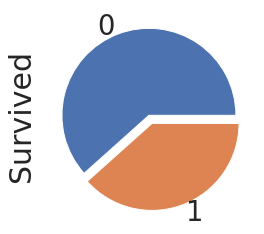

In [17]:
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1]) #제대로 분리

<AxesSubplot:ylabel='Survived'>

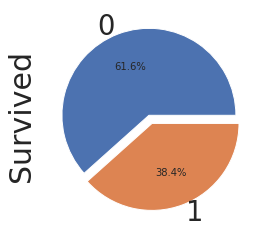

In [18]:
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%') #비율표시

In [19]:
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0])

<AxesSubplot:title={'center':'Pie plot - Survived'}, ylabel='Survived'>

In [20]:
ax #첫번째 꺼, 두번째 꺼

array([<AxesSubplot:title={'center':'Pie plot - Survived'}, ylabel='Survived'>,
       <AxesSubplot:title={'center':'Count plot - Survived'}, xlabel='Survived', ylabel='count'>],
      dtype=object)

# 2. Exploratory data analysis
- 데이터분석 시작
- 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있다. 특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하기

## 2-1 Pclass
- Pclass 는 ordinal, 서수형 데이터이다. 카테고리이면서 순서가 있는 데이터 타입
- pandas dataframe 에서는 groupby를 사용하면 쉽게 할 수 있다. 또한, pivot이라는 메소드도 있다.

In [21]:
df_train.shape

(891, 12)

In [22]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).count()

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [23]:
df_train[['Pclass','Survived']] #리스트로 묶기

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [24]:
df_train[['Pclass','Survived']].groupby(['Pclass'])  #Pclass 별로 그룹화 해줌

In [25]:
df_train[['Pclass','Survived']].groupby(['Pclass']).count() #각 class 에 몇명이 있는 지 확인

,Survived
Pclass,
1,216
2,184
3,491


In [26]:
df_train[['Pclass','Survived']].groupby(['Pclass']).sum() #216 명중 생존한사람의 총합

,Survived
Pclass,
1,136
2,87
3,119


In [27]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='ocean')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [28]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=False) #all차이

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [29]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [30]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).count()

,Pclass,Survived
0,1,216
1,2,184
2,3,491


<AxesSubplot:xlabel='Pclass'>

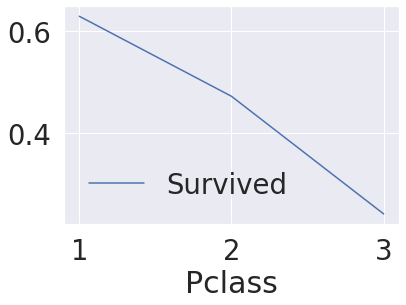

In [31]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot() #내림차순

<AxesSubplot:>

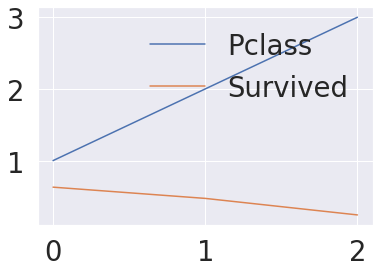

In [32]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False).plot() #내림차순

<AxesSubplot:xlabel='Pclass'>

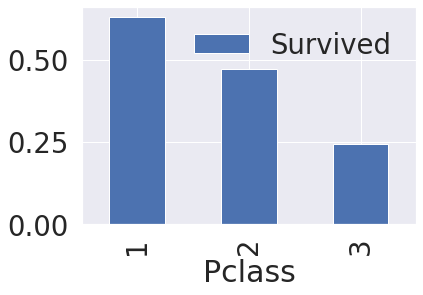

In [33]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar() #내림차순

In [34]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False) #내림차순/각 클래스별 생존률을 나타냄

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


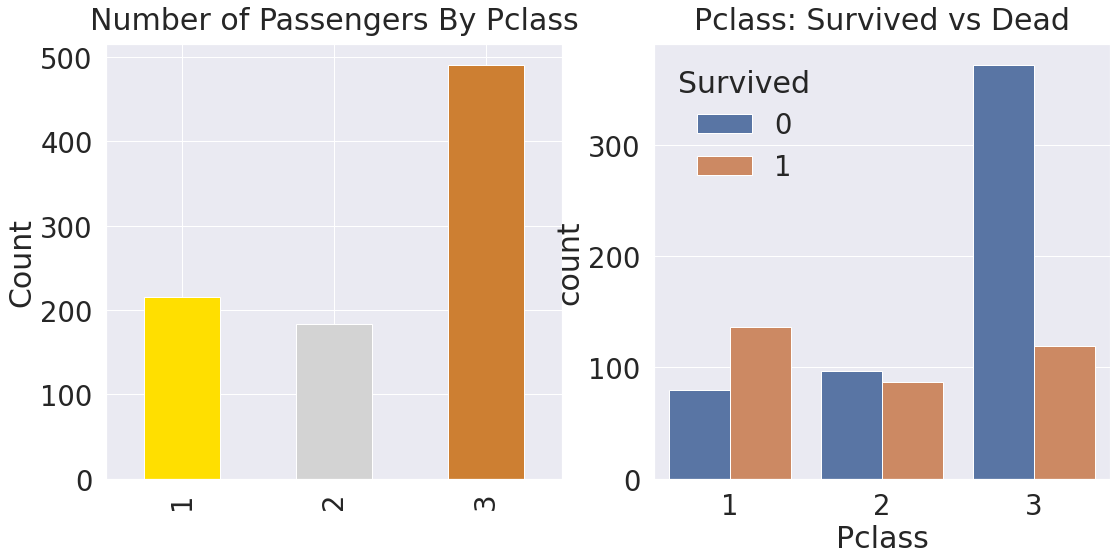

In [35]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1]) #hue=색깔로 구분
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- First class일수록 생존할 확률이 더 높았다                                                        

## 2.2 Sex
- 성별로 생존률이 어떻게 달라지는 지 확인
- pandas groupby 와 seaborn countplot을 사용해서 시각화

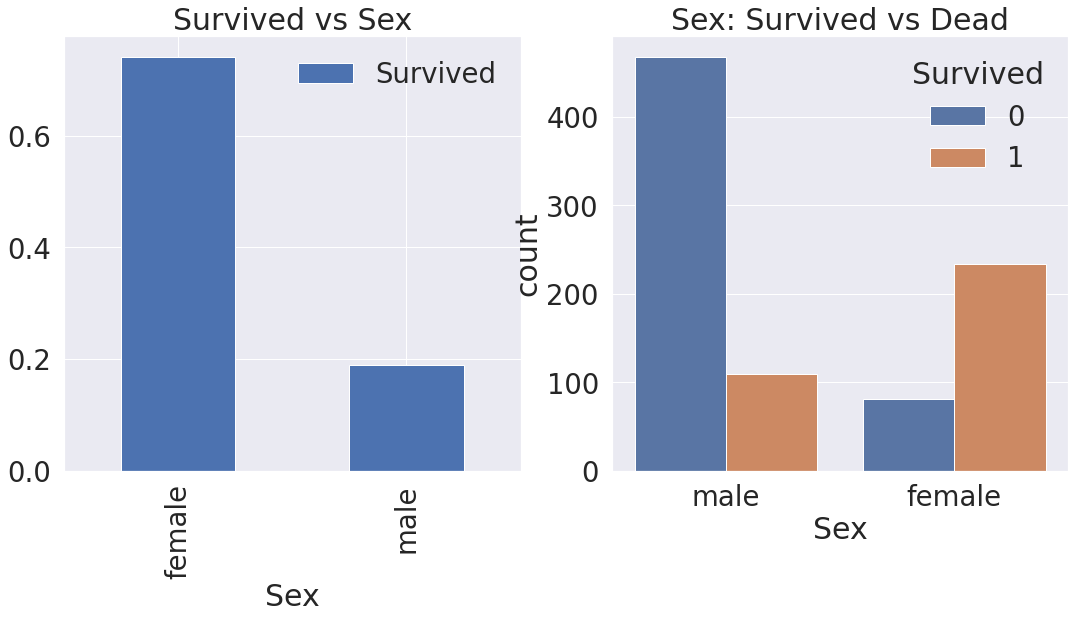

In [36]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

여자의 생존률이 더 높은 것을 확인할 수 있다.

In [37]:
df_train[['Sex', 'Survived']].groupby(['Sex'])

In [38]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [39]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [40]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass
- Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는 지 확인
- seaborn 의 factorplot을 이용하면 3개의 차원으로 이루어진 그래프를 그릴 수 있다.

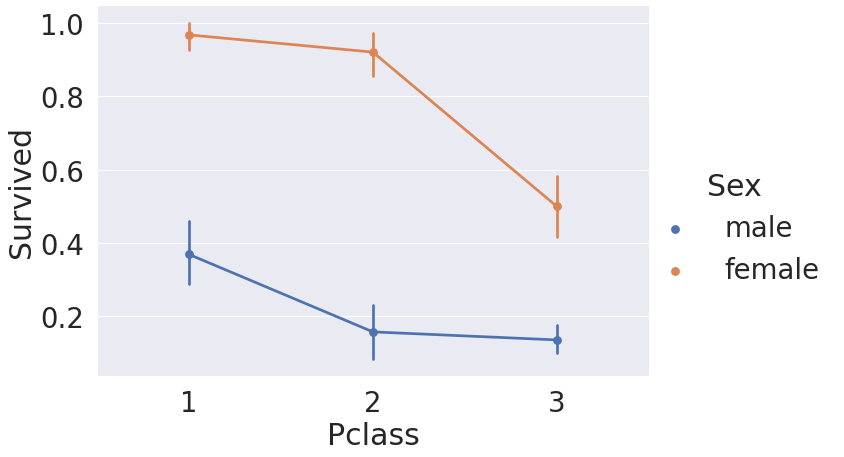

In [41]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)  #hue=sex이므로 성별로 나눔

- survived가 male의 경우 대략 40%/ female의 경우 90%인 것을 알 수 있다.
- 모든 클래스에서 female이 살 확률이 male보다 높은 걸 알 수 있다.
- 남자, 여자 상관없이 클래스가 높을 수록 살 확률이 높다.

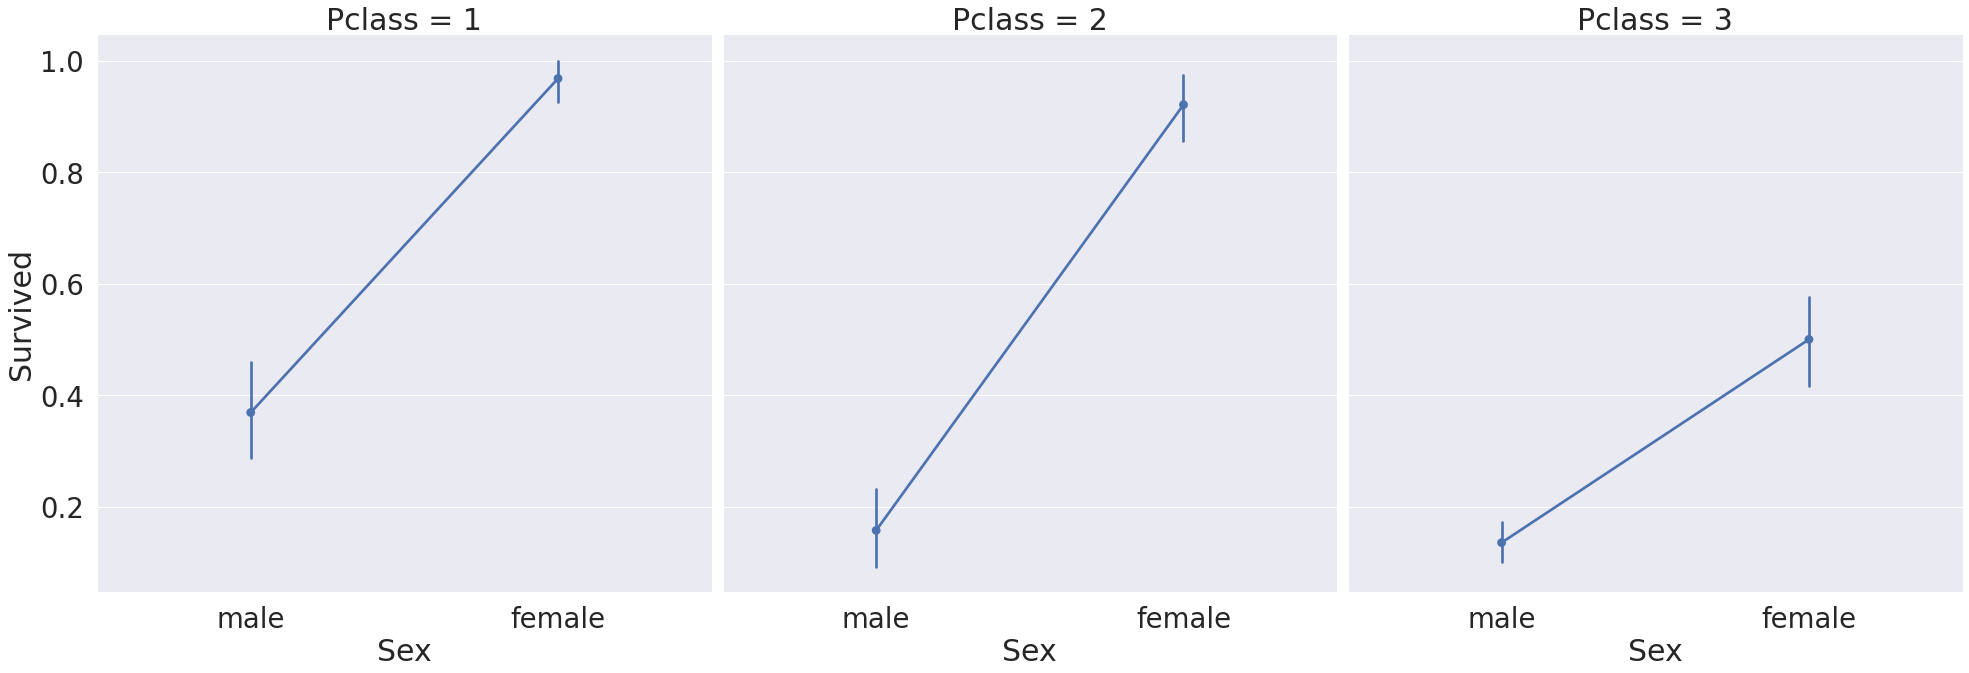

In [42]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1)
#colum 별로 나눔

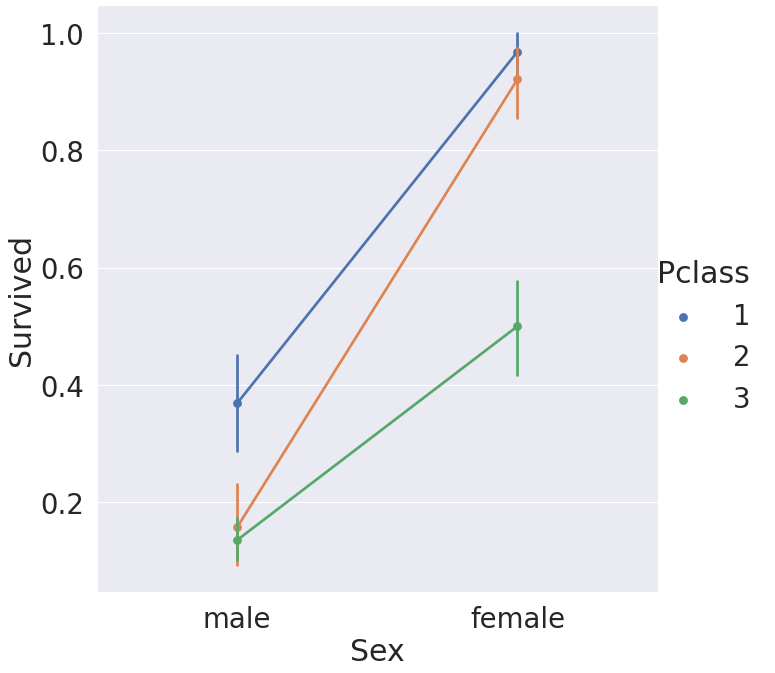

In [43]:
sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=df_train, satureation=.5, size=9, aspect=1)
#colum 별로 나눔

## 2.4 Age


In [44]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))#나이 최댓값
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min())) # 나이 최솟값
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean())) # 평균 나이

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


In [45]:
foo = df_train['Age']

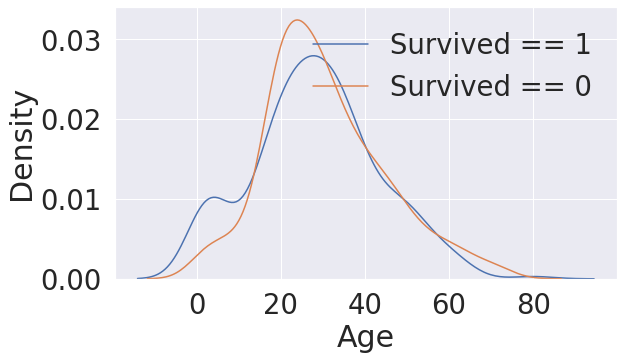

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax) #히스토그램을 부드럽게 그린 것
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- 나이가 어릴수록 생존할 확률이 높았다.

### 커널 밀도 추정(KDE: Kernel Density Estimator)
분포를 확인할 때 히스토그램을 많이 활용하는데 구간을 어떻게 설정하느냐에 따라서 결과물이 매우 달라져서, 엉뚱한 결론과 해석을 내릴 수 있기 때문에 조심해야 한다. 그래서 그 대안으로 _커널 밀도 추정_ 을 쓴다.
- 히스토그램같은 분포를 부드럽게 곡선화 시켜준다.
- seaborn에서 sns.kdeplot() 사용

<AxesSubplot:>

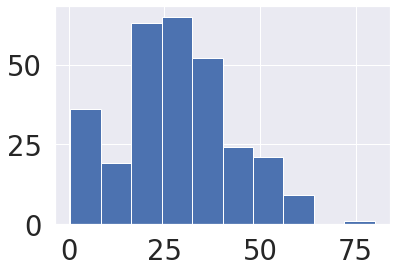

In [47]:
df_train[df_train['Survived']==1]['Age'].hist() #히스토그램으로 데이터들의 분포확인

In [48]:
df_train.iloc[0, :]  #pandas 의 인덱싱 하는 방법

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                              22.00
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [49]:
for row in df_train.iterrows():  #인덱싱 하는 방법
    break

In [50]:
row

(0,
 PassengerId                          1
 Survived                             0
 Pclass                               3
 Name           Braund, Mr. Owen Harris
 Sex                               male
 Age                              22.00
 SibSp                                1
 Parch                                0
 Ticket                       A/5 21171
 Fare                              7.25
 Cabin                              NaN
 Embarked                             S
 Name: 0, dtype: object)

In [51]:
df_train['Survived']==1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [52]:
df_train[df_train['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


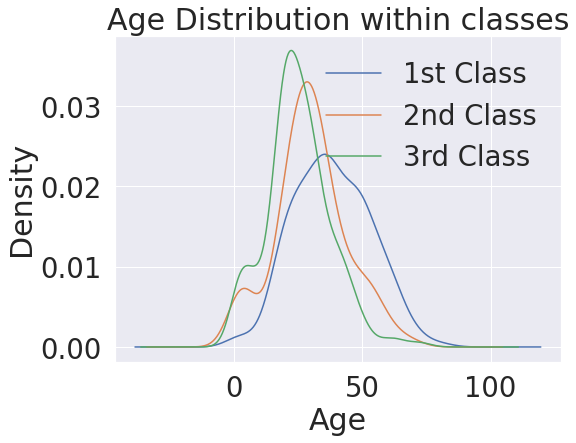

In [53]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- class 가 높을 수록 나이 많은 사람의 비중이 커짐

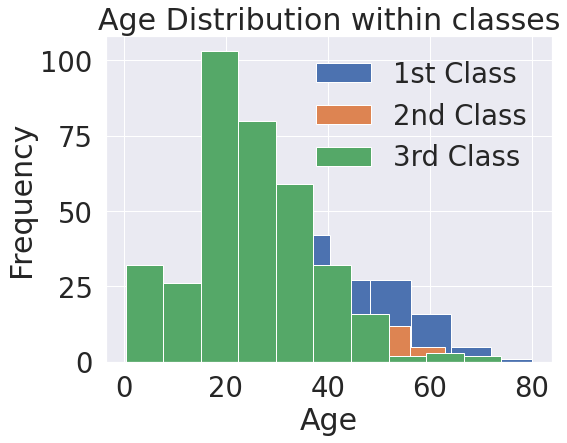

In [54]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='hist')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='hist')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='hist')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

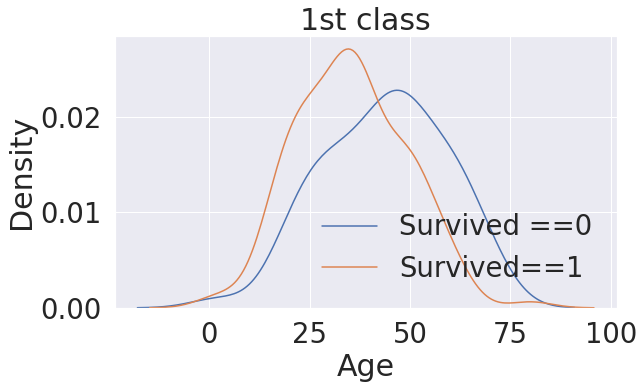

In [55]:
fig,ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0)&(df_train['Pclass']==1)]['Age'],ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1)&(df_train['Pclass']==1)]['Age'],ax=ax)
plt.legend(['Survived ==0','Survived==1'])
plt.title('1st class')
plt.show()

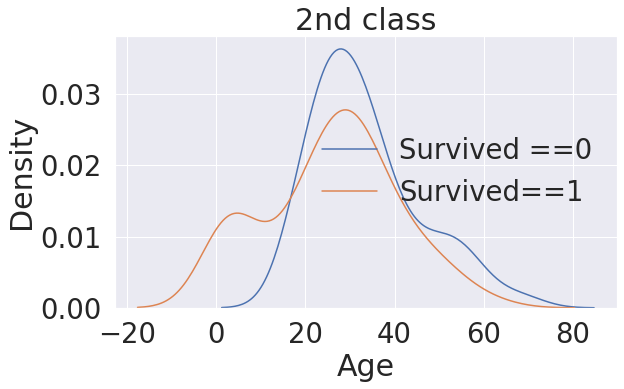

In [56]:
fig,ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0)&(df_train['Pclass']==2)]['Age'],ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1)&(df_train['Pclass']==2)]['Age'],ax=ax)
plt.legend(['Survived ==0','Survived==1'])
plt.title('2nd class')
plt.show()

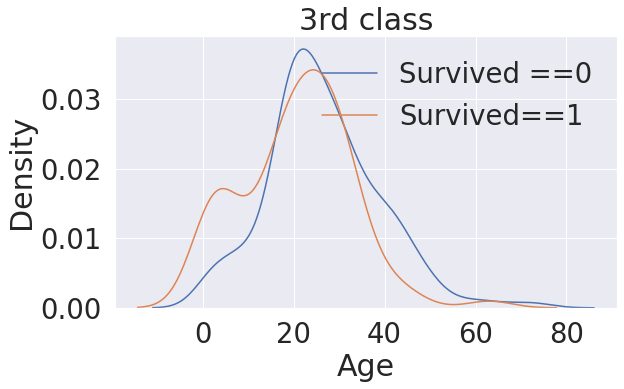

In [57]:
fig,ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0)&(df_train['Pclass']==3)]['Age'],ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1)&(df_train['Pclass']==3)]['Age'],ax=ax)
plt.legend(['Survived ==0','Survived==1'])
plt.title('3rd class')
plt.show()

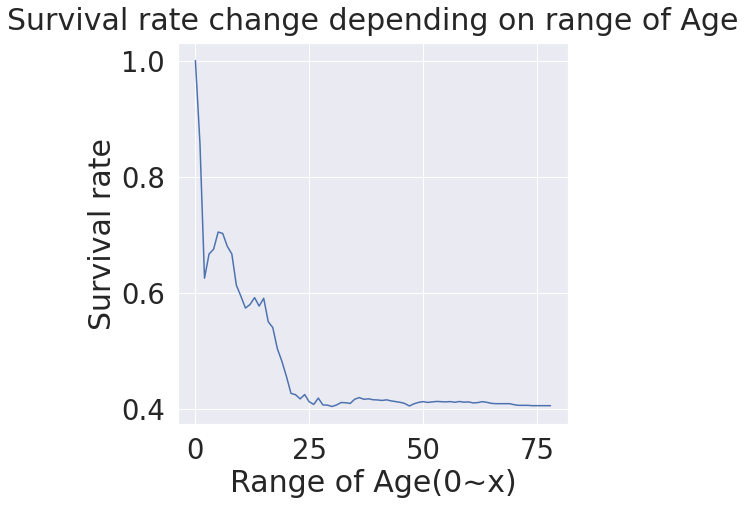

In [58]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴수록 생존률이 확실히 높아지는 것을 확인할 수 있다.
- 나이가 중요한 feature로 쓰일 수 있음을 확인.

In [59]:
i=10 #10살 미만의 사람들 중에서 몇명이나 생존했는지
df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived'])

0.6129032258064516

## 2.5 Pclass, Sex, Age
- 지금까지 본 Sex,Pclass,Age,Survived 모두에 대해서 확인하기 쉽게 그려주는 것이 seaborn의 violinplot 입니다.
- x 축은 우리가 나눠서 보고싶어하는 case(여기선 Pclass,Sex)를 나타내고, y축은 보고 싶어하는 distribution(Age) 이다.

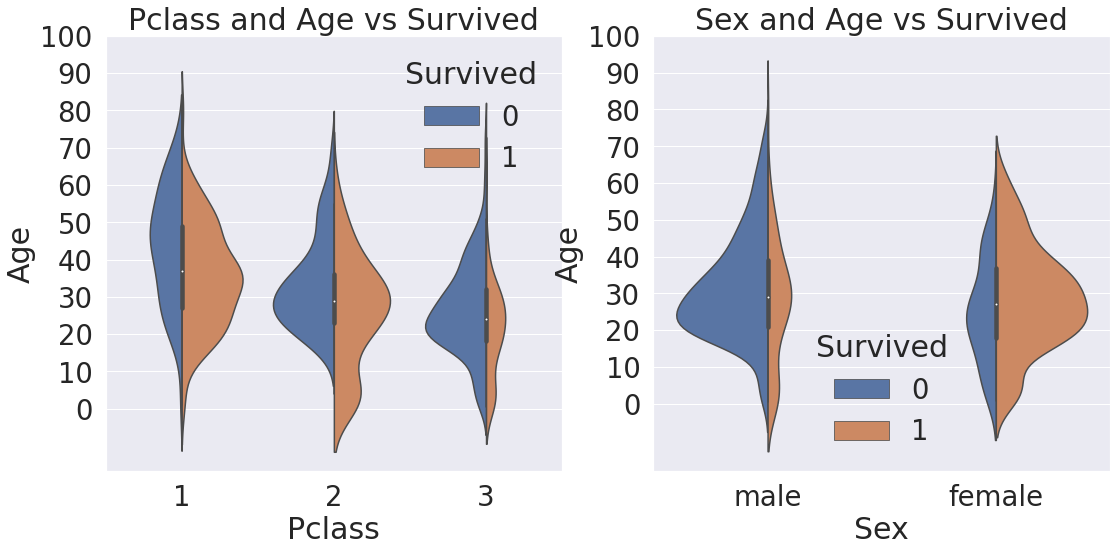

In [60]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived', data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=df_train, scale='count',split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 왼쪽 그림은 Pclass 별로 Age 의 distribution 이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프이다.
- 오른쪽 그림도 마찬가지 Sex, 생존에 따른 distribution이 어떻게 다른지 보여주는 그래프이다.
- 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있다.
- 오른쪽 그림을 보면 명확히 여자가 생존을 많이 한 것을 볼 수 있다.
- https://seaborn.pydata.org/generated/seaborn.violinplot.html

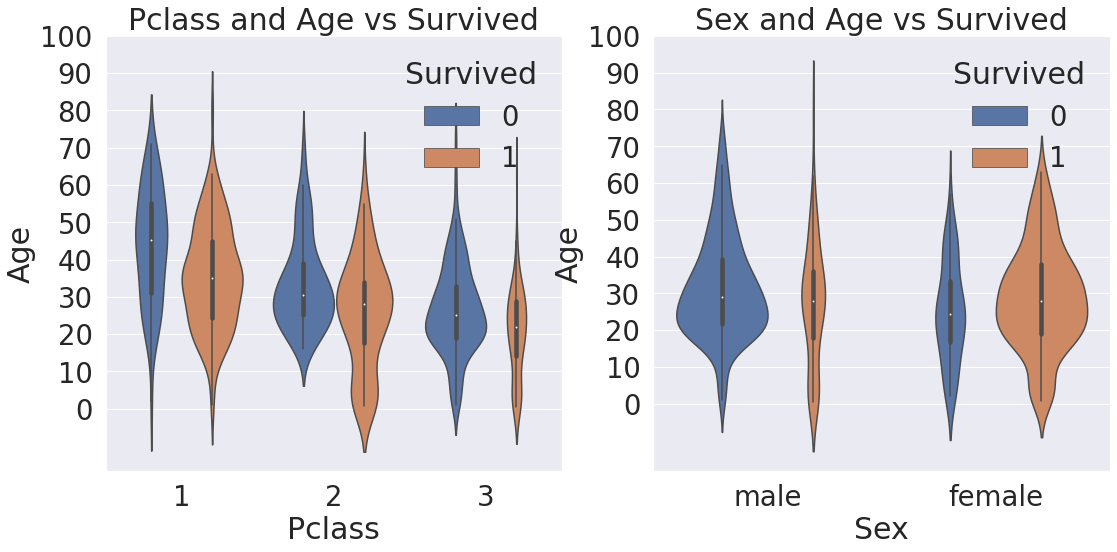

In [61]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived', data=df_train, scale='count', split=False,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=df_train, scale='count',split=False,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

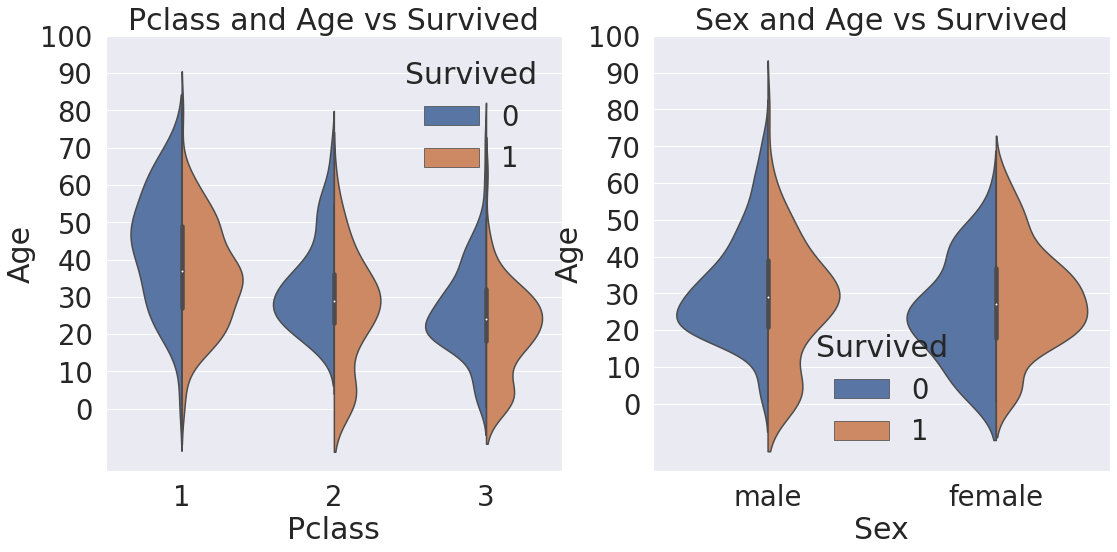

In [62]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived', data=df_train, scale='area', split=True,ax=ax[0])
#scale='area' : 0,1의 distribution을 명확히 알 수 있다.->같은 면적으로 만들어줌
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=df_train, scale='area',split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

## 2.6 Embarked
- Embarked 는 탑승한 항구를 나타낸다.
- 탑승한 곳에 따른 생존률 보기

<AxesSubplot:xlabel='Embarked'>

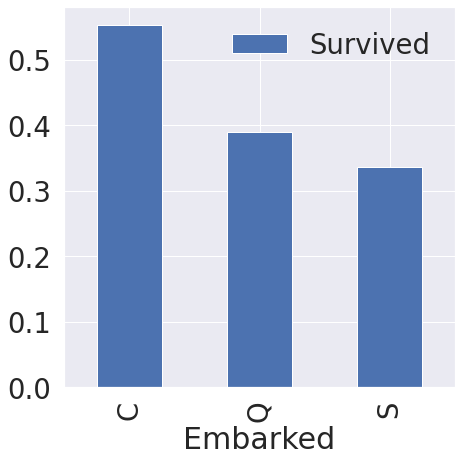

In [63]:
f,ax=plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)


In [64]:
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [65]:
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [66]:
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


- C항구의 생존률이 제일 높다.
- 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그래도 사용해보기

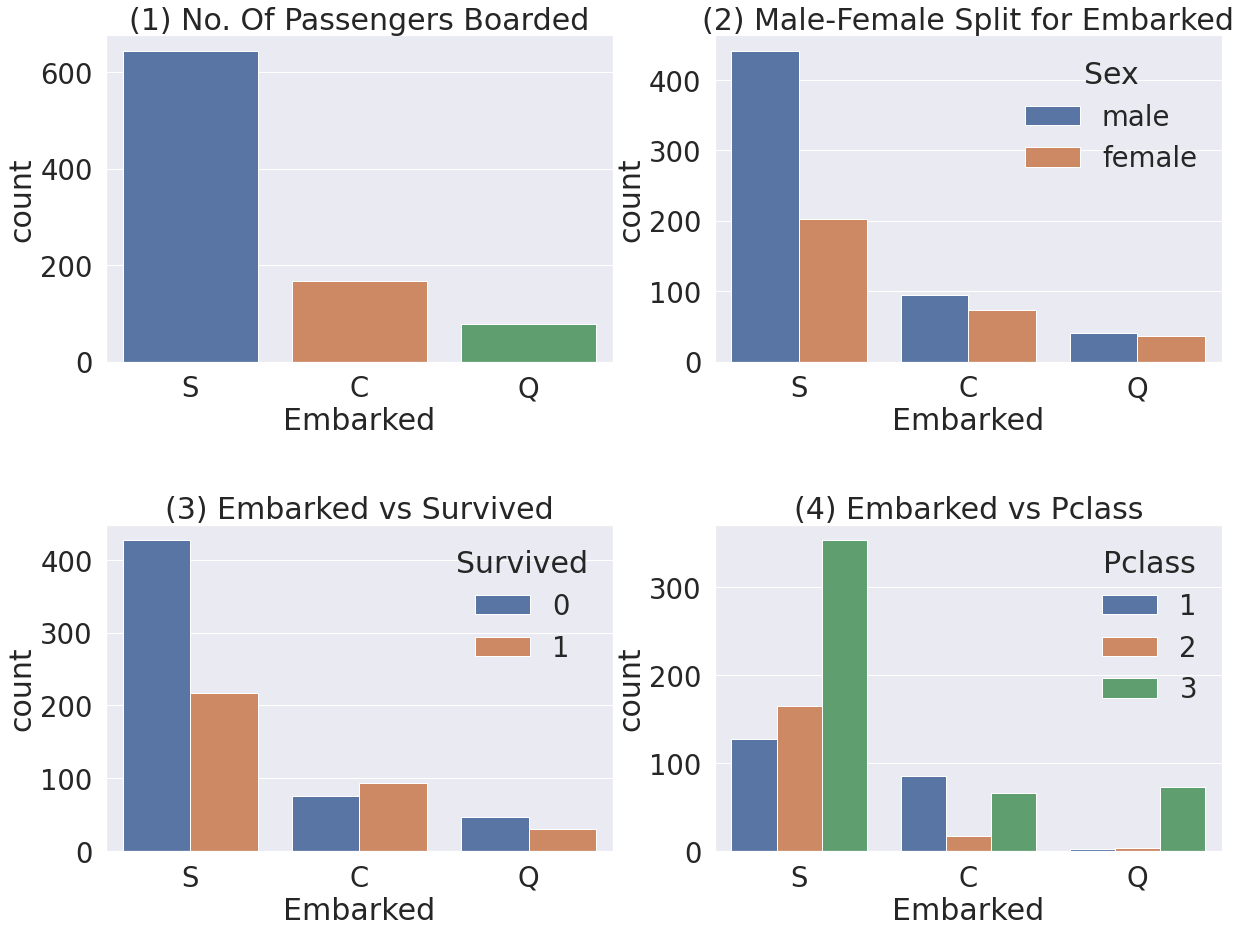

In [67]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex', data=df_train,ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5) #좌우간격,상하간격
plt.show()

### subplots 간 간격 조절
subplots_adjust(left, bottom, right, top, wspace, hspace)
- (left, bottom, right, top) 서브플롯 4면의 위치 조정
- (hspace, wspace) 서브플롯 간의 간격을 위해 각각 figure의 너비와 높이에 대한 비율 조절

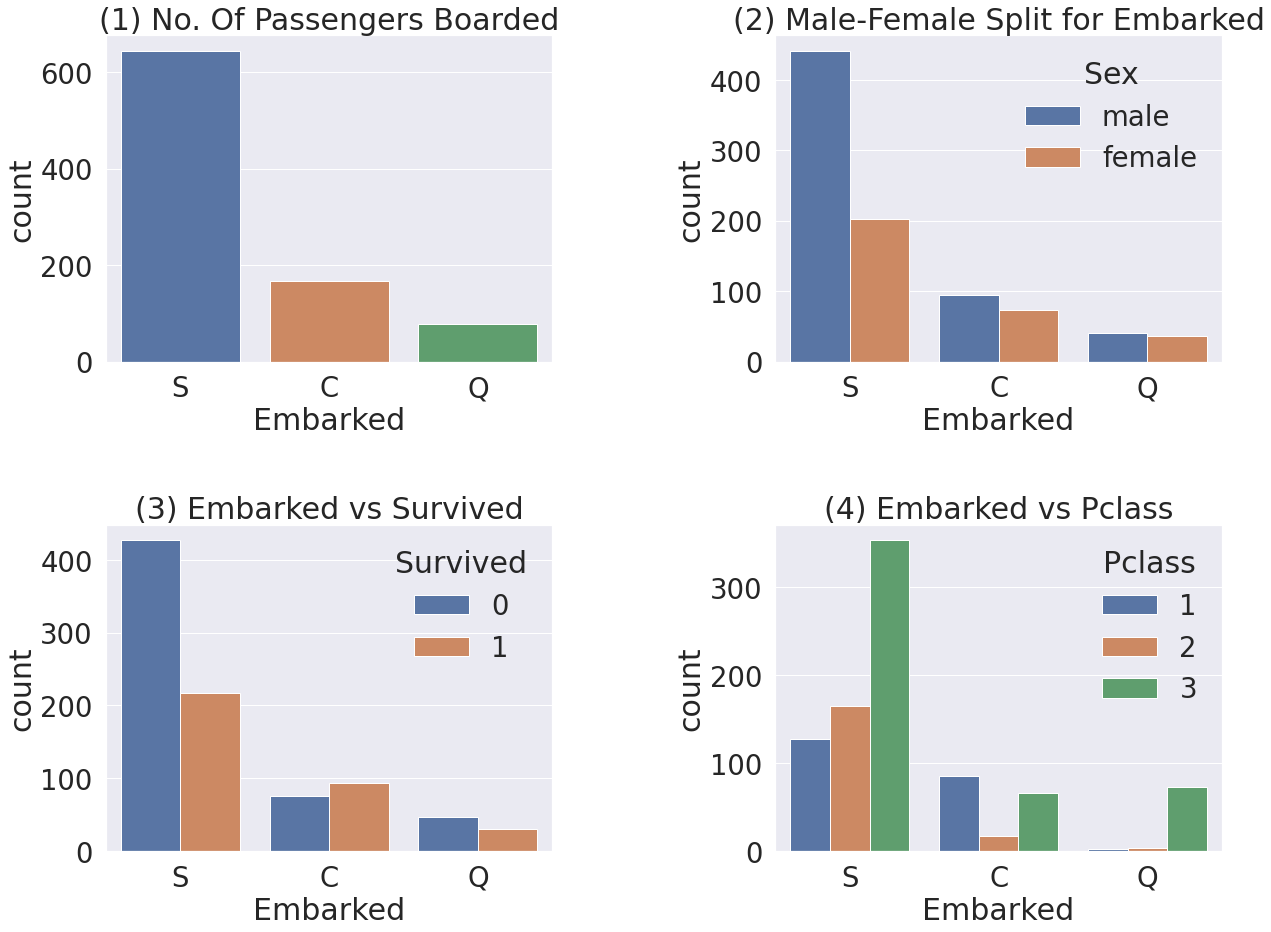

In [68]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex', data=df_train,ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.5,hspace=0.5) #좌우간격,상하간격
plt.show()

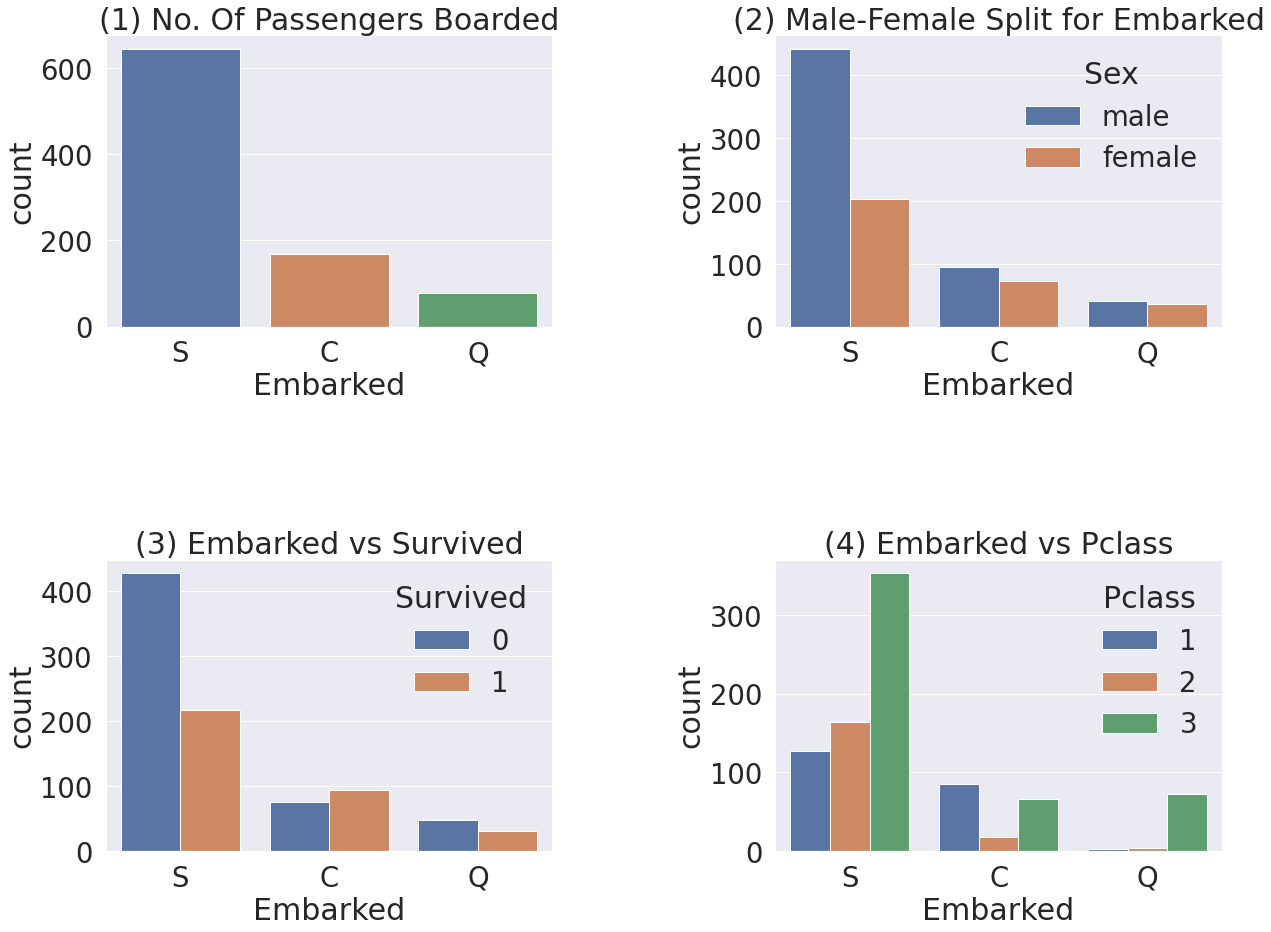

In [69]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex', data=df_train,ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.5,hspace=0.8) #좌우간격,상하간격
plt.show()

- Figure(1) : 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승
- Figure(2) : C와 Q는 남녀의 비율이 비슷하고, S는 남자가 더 많다.
- Figure(3) : 생존확률이 S 경우 많이 낮은 걸 볼 수 있다.
- Figure(4) : Class 로 split 해서 보니, C가 생존확률이 높은 건 클래스가 높은 사람이 많이 타서 그런다 S는 3rd Class 가 많아서 생존확률이 낮게 나온다.

## 2.7 Family - SibSp(형제 자매) + Parch(부모,자녀)
- SibSp와 Parch를 합치면 Family가 된다. Family로 합쳐서 분석하기

In [70]:
df_train['FamilySize']=df_train['SibSp'] + df_train['Parch']+1 #자신을 포함해야하니 1을 더한다.

In [71]:
df_test['FamilySize']=df_test['SibSp']+df_test['Parch']+1 #자신을 포함해야 하니 1을 더한다.

In [72]:
df_train['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [73]:
print("Maximum size of Family:", df_train['FamilySize'].max())
print("Maximum size of Family:", df_train['FamilySize'].min())

Maximum size of Family: 11
Maximum size of Family: 1


In [74]:
df_train['SibSp']/df_train['Parch']

0      inf
1      inf
2      NaN
3      inf
4      NaN
      ... 
886    NaN
887    NaN
888    0.5
889    NaN
890    NaN
Length: 891, dtype: float64

In [75]:
df_train['SibSp']*df_train['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Length: 891, dtype: int64

- FamilySize 와 생존의 관계를 살펴보자

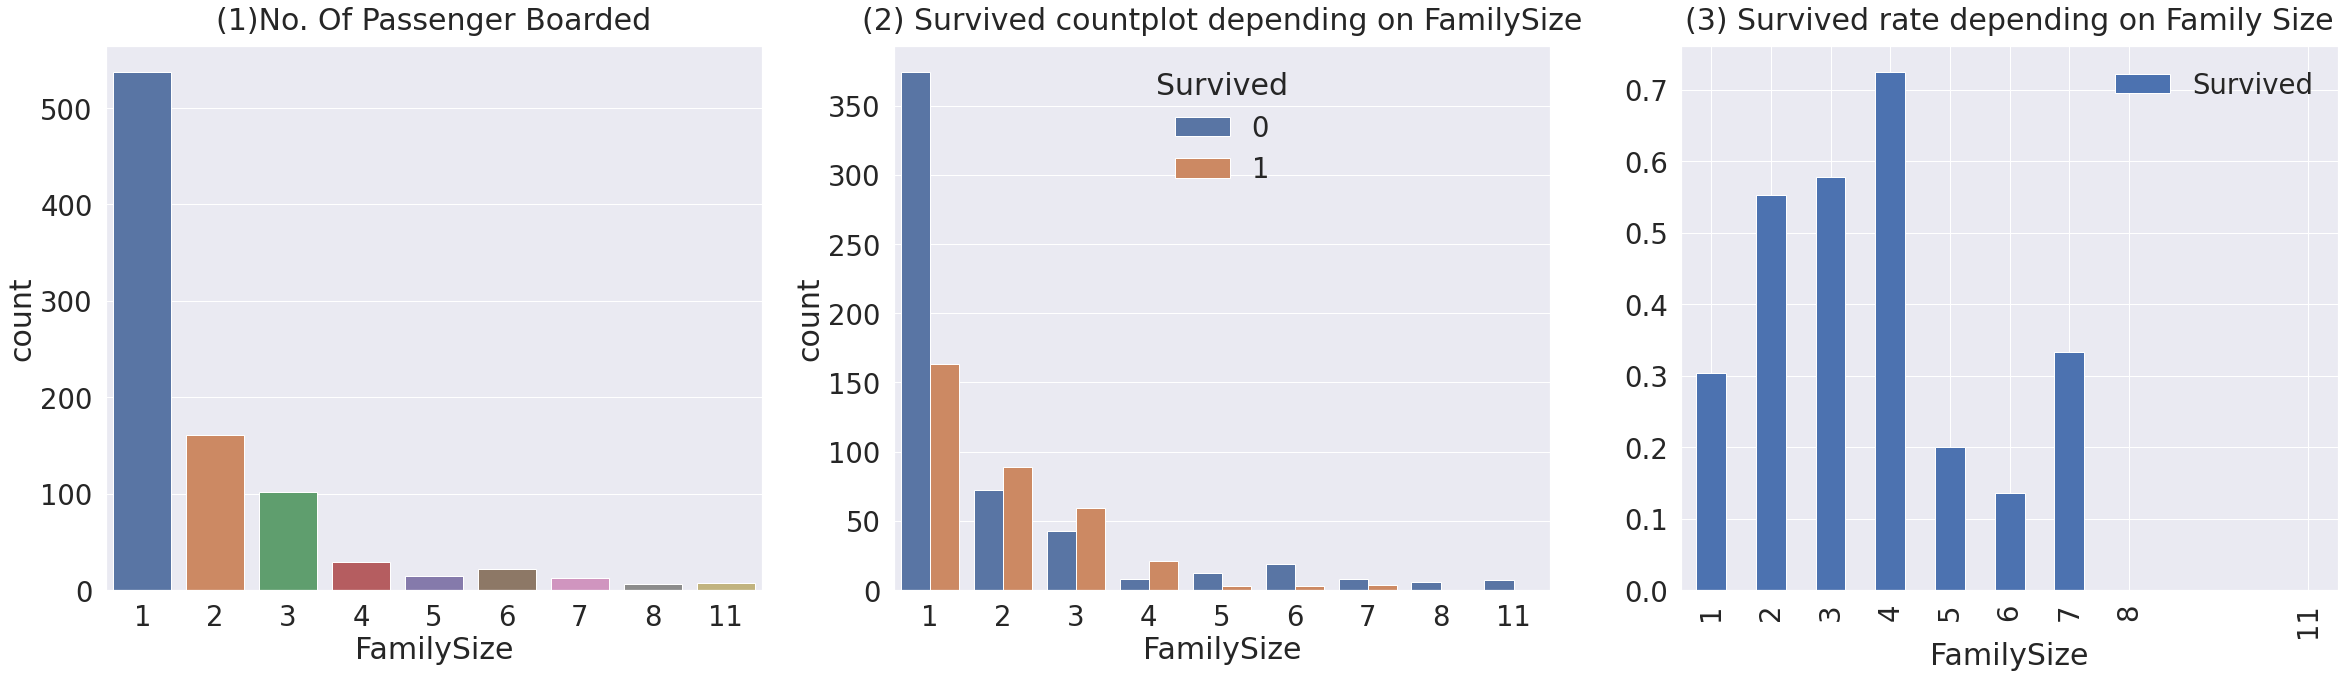

In [76]:
f,ax=plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize', data=df_train,ax=ax[0])
ax[0].set_title('(1)No. Of Passenger Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on Family Size', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

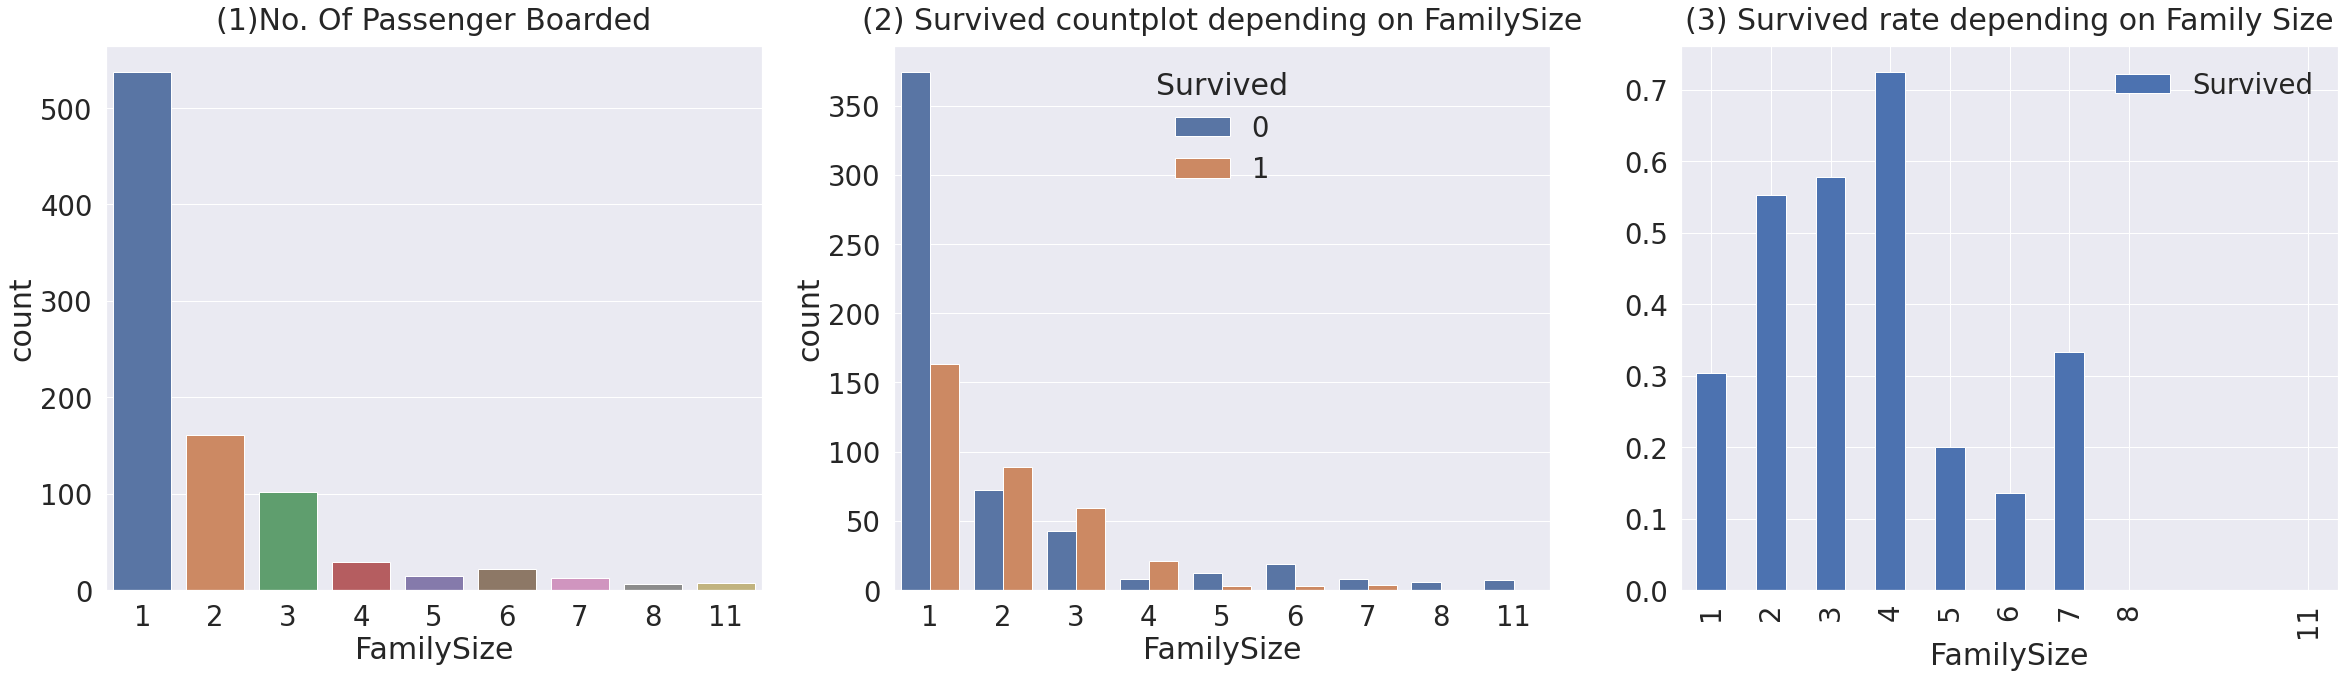

In [77]:
f,ax=plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize', data=df_train,ax=ax[0])
ax[0].set_title('(1)No. Of Passenger Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1]) #생존유무에 따라 색갈 다르게
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on Family Size', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.7)
plt.show()

- Figure(1) - 가족크기가 1~11까지 있음을 볼 수 있다. 대부분 1명이고 그 다음으로 2,3,4명이다.
- Figure(2),(3) - 가족 크기에 따른 생존비교이다. 가족이 4명인 경우가 가장 생존확률이 높았다. 가족수가 많아질수록 생존확률이 점점 낮아진다. 

## 2.8 Fare
- fare는 탑승요금이고, continuous feature이다.

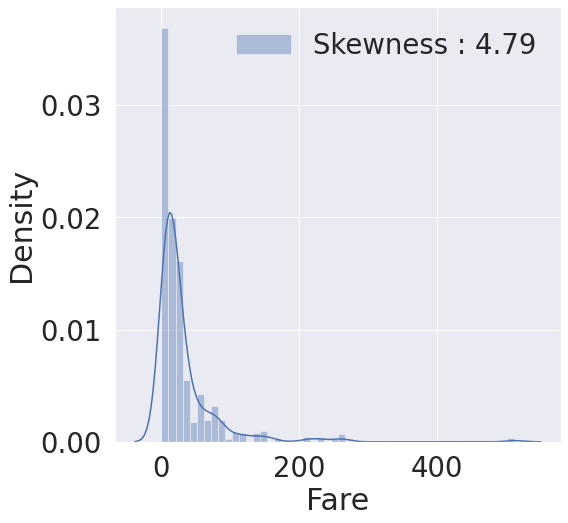

In [78]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
g=sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
#skewness 를 통해 fare 데이터가 얼마나 비대칭인지 확인
#positive skewness
g=g.legend(loc='best')  #범례 plt.legend(labels='범례 이름', loc='원하는 위치')
# loc='best' 는 그래프를 가리지 않도록 적절한 위치에 알아서 범례 표시

### skew() 왜도 
- Skewness를 측정한 값 기준으로 -2~+2는 치우침이 없는 데이터
- Skewed 데이터를 변환하는 이유는 꼬리에 있는 값을 모델에 제대로 학습시키기 위함이다.
- (-2) 미만은 Negative Skew, (+2) 초과는 Positive Skew
- Positive Skewness는 오른쪽에 꼬리를 가진(왼쪽에 데이터가 많은)형태이고, Negative Skewness는 왼쪽에 꼬리를 가진(오른쪽에 데이터가 많은) 형태

### kurt() 첨도
- 확률분포의 뾰족한 정도. 표준정규분포와 비교하여 얼마나 뽀족한가 측정 지표
- kurt = 0 : 표준정규분포정도
- kurt < 0 : 표준정규분포보다 둥글다
- kurt > 0 : 표준정규분포보다 뾰족

- diftribution이 매우 비대칭인 것을 알 수 있다. 만약 이대로 모델에 넣어준다면 모델이 잘못 학습할 수 있다. -> positive Skew
- outlier의 영향을 줄이기 위해 Fare 에 log 값을 취한다.

In [79]:
df_train['Fare']=df_train['Fare'].map(lambda i : np.log(i) if i>0 else 0)  #i>0이면 log값을 취한다.

In [80]:
df_test.loc[df_test.Fare.isnull(),'Fare']=df_test['Fare'].mean() #testset에 있는 nan value를 평균값으로 치환한다.

df_train['Fare']=df_train['Fare'].map(lambda i:np.log(i) if i>0 else 0)
df_test['Fare']=df_test['Fare'].map(lambda i:np.log(i) if i>0 else 0)

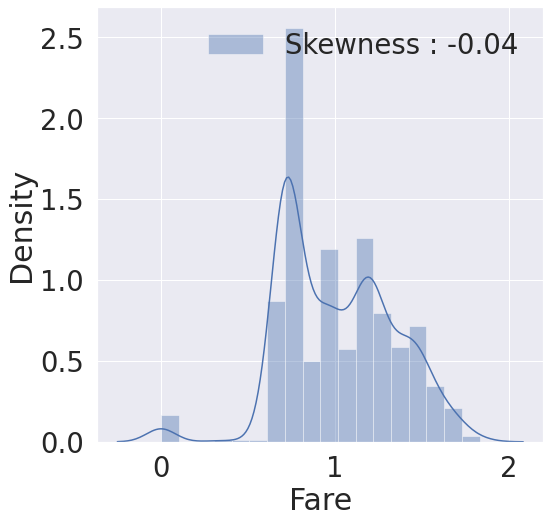

In [81]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
g=sns.distplot(df_train['Fare'],color='b',label='Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g=g.legend(loc='best')

- log를 취하니, 비대칭성이 많이 사라진 것을 볼 수 있다.
- 이러한 작업을 통해서 모델이 좀 더 좋은 성능을 내도록 할 수 있다.
- 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering이라고 한다.

## 2.9 Cabin
- 이 feature는 NaN이 대략 80%이므로, 생존에 영향을 미칠 중요한 정보를 얻기가 쉽지 않다.
- 그러므로 모델에 포함시키지 않는다.

In [82]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.683603,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1.450832,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.727559,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,1.379314,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.735091,NaN,S,1


## 2.10 Ticket
이 feature는 NaN 은 없다. STRING DATA 이기 때문에 어떤 작업들을 해주어야 실제 모델에 사용할 수 있다.

In [83]:
df_train['Ticket'].value_counts()

1601               7
CA. 2343           7
347082             7
3101295            6
CA 2144            6
                  ..
SOTON/OQ 392086    1
330931             1
228414             1
365222             1
2664               1
Name: Ticket, Length: 681, dtype: int64

- ticket number는 매우 다양하다. 여기서 어떤 특징을 이끌어내서 생존과 연결 시킬 수 있을까?
- 우선 이 feature는 넘긴다.

# 3. Feature engineering 
분석에 쓸 중요한 변수들 선별
- datatset 에 존재하는 null data를 채운다.
- null data를 포함하는 feature의 statistics를 참고하거나, 다른 아이디어로 채운다.
- null data를 어떻게 채우느냐에 따라 모델의 성능이 달라질 수 있다.
- Feature engineering 은 실제 모델의 학습에 쓰려고 하는 것이므로, train 뿐만아닐라 test 도 똑같이 적용해주어야 한다.

## 3.1 Fill Null
### 3.1.1 Fill Null in Age using title
- title+statistics를 사용해 Null data 값을 채운다.
- 탑승객의 이름에 Miss,Mrr, Mrs 같은 title이 존재한다.
- pandas series 에는 data 를 string 으로 바꿔주는 str method, 거기에 정규표현식을 적용하게 해주는 extract method가 있다. 이를 사용하여 title 을 쉽게 추출할 수 있다.

In [84]:
df_train['Age'].isnull().sum()  #null 데이터를 어떻게 채울 것인가??

177

In [85]:
df_train['Age'].mean()  #평균으로 쓰기엔 적절하지 않음

29.69911764705882

In [86]:
df_train['Name'].str.extract('([A-Za-z]+)\.')  #이름을 정규표현식으로 뽑기

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [87]:
df_train['Name'[:10]] #10개까지의 리스트 뽑기

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [88]:
df_test['Name'].str.extract('([A-Za-z]+)\.')  #이름을 정규표현식으로 뽑기

,0
0,Mr
1,Mrs
2,Mr
3,Mr
4,Mrs
...,...
413,Mr
414,Dona
415,Mr
416,Mr


In [89]:
df_train['Initial']=df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial']=df_train['Name'].str.extract('([A-Za-z]+)\.')

In [90]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


### pd.crosstab()
범주형 변수로 되어있는 요인별로 교차분석해서, 행, 열 요인 기준 별로 빈도를 세어서 도수분포표,교차표를 만들어준다.
- df_train['Initial'] 를 기준으로 Sex의 빈도를 구한다.

In [91]:
pd.crosstab(df_train['Initial'], df_train['Sex'],margins=True).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [92]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'])
#일대일로 바꿔준다.

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Initial, Length: 891, dtype: object

In [93]:
df_train['Initial']  #inplace=True 를 해주지 않으면 안바뀜

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [94]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)
#일대일로 바꿔준다.

In [95]:
df_train['Initial']

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Initial, Length: 891, dtype: object

In [96]:
df_train.groupby('Initial').mean()  #각 initial 별로 통계치가 나옴

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,1.190112,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,1.085686,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,0.932798,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,1.207905,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,0.958425,1.222222


- 여성과 관계있는 Miss,Mrs 가 생존률이 높은 것을 볼 수 있다.

<AxesSubplot:xlabel='Initial'>

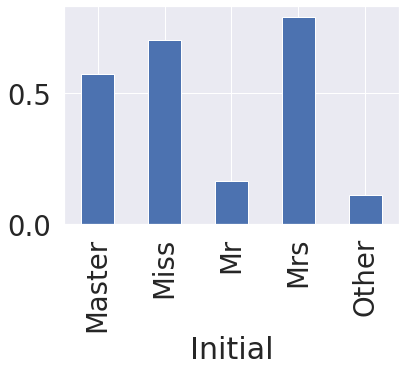

In [97]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

- train 에서 얻은 statistics 를 기반으로 test 의 null data 를 채워줘야 한다.

In [98]:
df_train.loc[:,:]  #행,열 추출하기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.683603,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1.450832,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.727559,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,1.379314,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.735091,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,0.941939,NaN,S,1,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,1.224128,B42,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,1.148947,NaN,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,1.224128,C148,C,1,Mr


In [99]:
df_train.loc[1,:]    #행추출

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                    38.000000
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                    1.450832
Cabin                                                        C85
Embarked                                                       C
FamilySize                                                     2
Initial                                                      Mrs
Name: 1, dtype: object

In [100]:
df_train.loc[1:2,:]   #행추출

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1.450832,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.727559,NaN,S,1,Miss


In [101]:
df_train.loc[[1,2]]  #행추출

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1.450832,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.727559,NaN,S,1,Miss


In [102]:
df_train.loc[1:,'Survived':'Pclass']  #열추출

,Survived,Pclass
1,1,1
2,1,3
3,1,1
4,0,3
5,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


In [103]:
df_train.iloc[1:,1:3]

,Survived,Pclass
1,1,1
2,1,3
3,1,1
4,0,3
5,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


In [104]:
df_train.loc[[1,2],['Survived','Pclass']]  #행과 열 추출

,Survived,Pclass
1,1,1
2,1,3


In [105]:
df_train.loc[(df_train['Age'].isnull()),:]  #Age 가 null 인 모든 행들 추출

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,0.758536,NaN,Q,1,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,0.941939,NaN,S,1,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,0.681857,NaN,C,1,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,0.681857,NaN,C,1,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,0.724756,NaN,Q,1,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,0.682151,NaN,C,1,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,1.445046,NaN,S,11,Miss
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,0.811504,NaN,S,1,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,0.725775,NaN,S,1,Mr


In [106]:
df_train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [107]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mr'),:]  
#df_train['Initial'] 인 사람들중에 Age가 null 값인 행 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,0.758536,NaN,Q,1,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,0.941939,NaN,S,1,Mr
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,0.681857,NaN,C,1,Mr
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,0.725775,NaN,S,1,Mr
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,0.682151,NaN,C,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,1.221168,C47,C,1,Mr
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,1.445046,NaN,S,11,Mr
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,0.682151,NaN,C,1,Mr
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,0.811504,NaN,S,1,Mr


In [108]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mr'),'Age']  

5     NaN
17    NaN
26    NaN
29    NaN
36    NaN
       ..
839   NaN
846   NaN
859   NaN
868   NaN
878   NaN
Name: Age, Length: 120, dtype: float64

In [109]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mr'),'Age'] = 33 
#null 값에 평균이었던 33 넣기

In [110]:
df_train.loc[(df_train['Initial']=='Mr'),'Age'].isnull().sum()

0

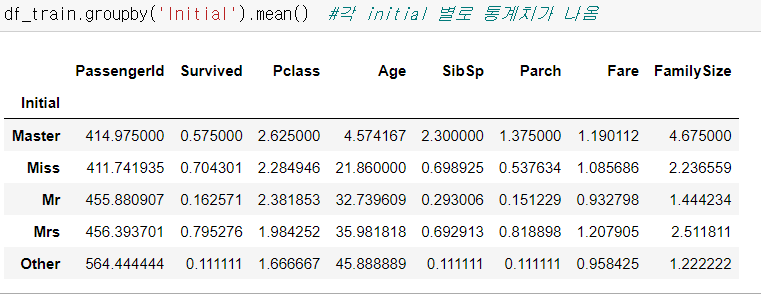

In [111]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Miss'),'Age'] = 22 
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mrs'),'Age'] = 36 
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Master'),'Age'] = 5 
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Other'),'Age'] = 46

df_test.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mr'),'Age'] = 33 
df_test.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Miss'),'Age'] = 22 
df_test.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mrs'),'Age'] = 36 
df_test.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Master'),'Age'] = 5 
df_test.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Other'),'Age'] = 46

### 3.1.2 Fill Null in Embarked

In [112]:
df_train['Embarked'].isnull().sum()

2

In [113]:
df_train.shape

(891, 14)

In [114]:
df_train['Embarked'].fillna('S',inplace=True)  #null 값 채운다/S가 가장 많았다.

In [115]:
df_train['Embarked'].isnull().sum()

0

## 3.2 Change Age(continuous to categorical)

In [116]:
df_train['Age_cat']=0  #열 추가/age를 카테고리화

In [117]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.683603,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1.450832,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.727559,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,1.379314,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.735091,NaN,S,1,Mr,0


In [118]:
df_train.loc[df_train['Age']<10, 'Age_cat']=0
df_train.loc[(10<=df_train['Age']) & (df_train['Age']<20), 'Age_cat']=1
df_train.loc[(20<=df_train['Age']) & (df_train['Age']<30), 'Age_cat']=2
df_train.loc[(30<=df_train['Age']) & (df_train['Age']<40), 'Age_cat']=3
df_train.loc[(40<=df_train['Age']) & (df_train['Age']<50), 'Age_cat']=4
df_train.loc[(50<=df_train['Age']) & (df_train['Age']<60), 'Age_cat']=5
df_train.loc[(60<=df_train['Age']) & (df_train['Age']<70), 'Age_cat']=6
df_train.loc[(70<=df_train['Age']), 'Age_cat']=7

In [119]:
df_test.loc[df_train['Age']<10, 'Age_cat']=0
df_test.loc[(10<=df_train['Age']) & (df_test['Age']<20), 'Age_cat']=1
df_test.loc[(20<=df_train['Age']) & (df_test['Age']<30), 'Age_cat']=2
df_test.loc[(30<=df_train['Age']) & (df_test['Age']<40), 'Age_cat']=3
df_test.loc[(40<=df_train['Age']) & (df_test['Age']<50), 'Age_cat']=4
df_test.loc[(50<=df_train['Age']) & (df_test['Age']<60), 'Age_cat']=5
df_test.loc[(60<=df_train['Age']) & (df_test['Age']<70), 'Age_cat']=6
df_test.loc[(70<=df_train['Age']), 'Age_cat']=7

In [120]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.683603,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1.450832,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.727559,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,1.379314,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.735091,NaN,S,1,Mr,3


In [121]:
# 함수로
def category_age(x):
    if x<10 :
        return 0
    elif x<20 :
        return 1
    elif x<30 :
        return 2
    elif x<40 :
        return 3
    elif x<50 :
        return 4
    elif x<60 :
        return 5
    elif x<70 :
        return 6
    else :
        return 7
    

In [122]:
df_train['Age'].apply(category_age) #apply 안에 적용하고자 할 함수 이름을 넣는다.

0      2
1      3
2      2
3      3
4      3
      ..
886    2
887    1
888    2
889    2
890    3
Name: Age, Length: 891, dtype: int64

1. 함수를 열로 적용
- apply(함수, axis = 0) -> default

2. 함수를 행으로 적용
- apply(함수, axis = 1)

In [123]:
df_train['Age_cat_2']=df_train['Age'].apply(category_age)

In [124]:
(df_train['Age_cat']==df_train['Age_cat_2']).all()  #모든 게 True 일때 True 값 반환

True

In [125]:
(df_train['Age_cat']==df_train['Age_cat_2']).any()  #하나라도 True 가 있으면 True 값 반환

True

In [126]:
df_train.drop(['Age','Age_cat_2'],axis=1,inplace=True) #colmn을 버리는 것/axis을 1로 두면 colunm이 세로로 없어짐.
df_test.drop(['Age'],axis=1,inplace=True)

## 3.3 Change string to categorical(string to numerical) and Pearson coefficient
- Initial
- Embarked
- Sex

수치 데이터로 바꿔준다.

In [127]:
df_train.Initial.unique() #한개의 값만

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [128]:
df_train.loc[df_train['Initial']=='Master','Initial']

7      Master
16     Master
50     Master
59     Master
63     Master
65     Master
78     Master
125    Master
159    Master
164    Master
165    Master
171    Master
176    Master
182    Master
183    Master
193    Master
261    Master
278    Master
305    Master
340    Master
348    Master
386    Master
407    Master
445    Master
480    Master
489    Master
549    Master
709    Master
751    Master
755    Master
787    Master
788    Master
802    Master
803    Master
819    Master
824    Master
827    Master
831    Master
850    Master
869    Master
Name: Initial, dtype: object

In [130]:
#수치 데이터로 변환->범주형 데이터
df_train['Initial']=df_train['Initial'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Other':4})
df_test['Initial']=df_test['Initial'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Other':4})

In [133]:
type(df_train.Embarked.unique())

numpy.ndarray

In [134]:
type(df_train['Embarked'].value_counts())

pandas.core.series.Series

In [135]:
df_train['Embarked']=df_train['Embarked'].map({'C':0,'Q':1,'S':2}) 
df_test['Embarked']=df_test['Embarked'].map({'C':0,'Q':1,'S':2})

In [137]:
df_train.Embarked.isnull().any()  #null데이터 존재 x

False

In [138]:
df_train.Embarked.isnull().sum()

0

In [139]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [140]:
df_train['Sex']=df_train['Sex'].map({'female':0,'male':1})
df_test['Sex']=df_test['Sex'].map({'female':0,'male':1})

### Pearson correlation coefficient 피어슨 상관 계수
- correlation 방법 중 하나
- feature 간의 선형적 상관관계 확인
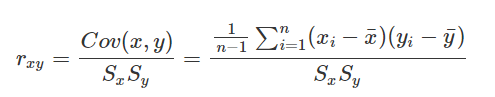
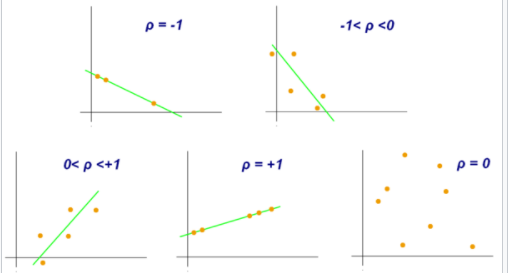

In [144]:
# 8*8 행렬로
heatmap_data=df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]

In [146]:
heatmap_data.corr() #pandas dataframe의 correlation을 전부 보여줌

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_cat
Survived,1.000000,-0.338481,-0.543351,0.332593,-0.167675,0.016639,-0.085529,-0.095002
Pclass,-0.338481,1.000000,0.131900,-0.659932,0.162098,0.065997,-0.133054,-0.314809
Sex,-0.543351,0.131900,1.000000,-0.271514,0.108262,-0.200988,0.051687,0.122917
Fare,0.332593,-0.659932,-0.271514,1.000000,-0.177469,0.410847,-0.016650,0.068385
Embarked,-0.167675,0.162098,0.108262,-0.177469,1.000000,0.066516,0.026550,-0.033173
FamilySize,0.016639,0.065997,-0.200988,0.410847,0.066516,1.000000,-0.204574,-0.280537
Initial,-0.085529,-0.133054,0.051687,-0.016650,0.026550,-0.204574,1.000000,0.481309
Age_cat,-0.095002,-0.314809,0.122917,0.068385,-0.033173,-0.280537,0.481309,1.000000


In [ ]:
#ax=sns.heatmap(df, #데이터
#              vmin=100, # 최솟값
#              vmax=700, # 최댓값
#              cbar=True, # colorbar의 유무
#              center=400, #중앙값 선정
#              linewidths=0.5, #cell 사이에 선을 집어 넣는다.
#              annot=True, fmt="d" # 각 cell의 값 표기 유무, 그 값의 데이터 타입 설정
#              cmap='Blues' #히트맵의 색을 설정한다.
#              square=True #차트를 정사각형을 할 것인지.)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

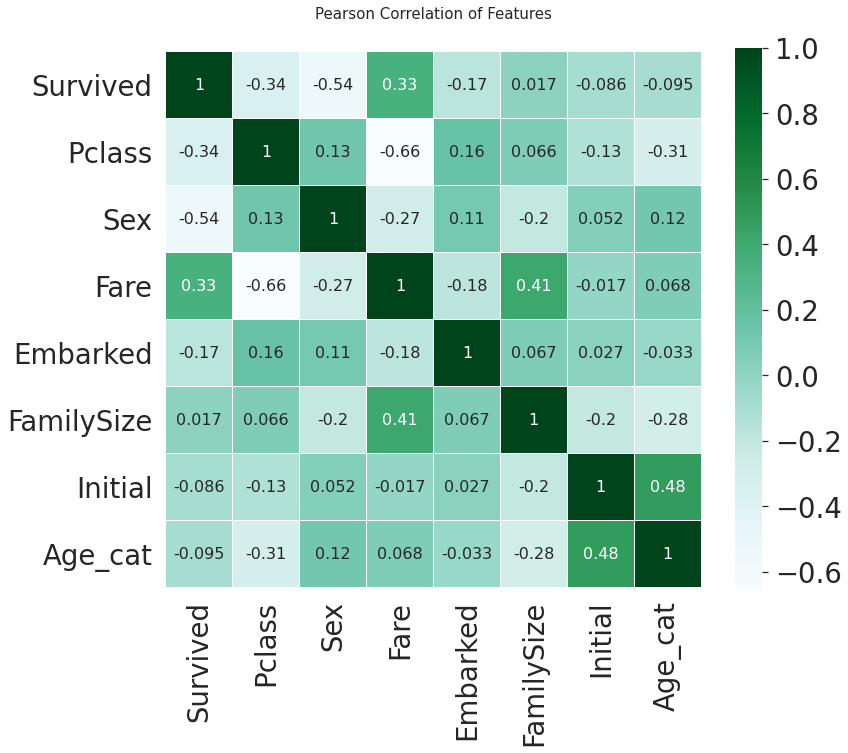

In [152]:
colormap=plt.cm.BuGn
plt.figure(figsize=(12,10))
plt.title('Pearson Correlation of Features',y=1.05 ,size=15)
sns.heatmap(heatmap_data.astype(float).corr(),linewidths=0.1,vmax=1.0,
           square=True,cmap=colormap,linecolor='white',annot=True, annot_kws={'size':16})

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

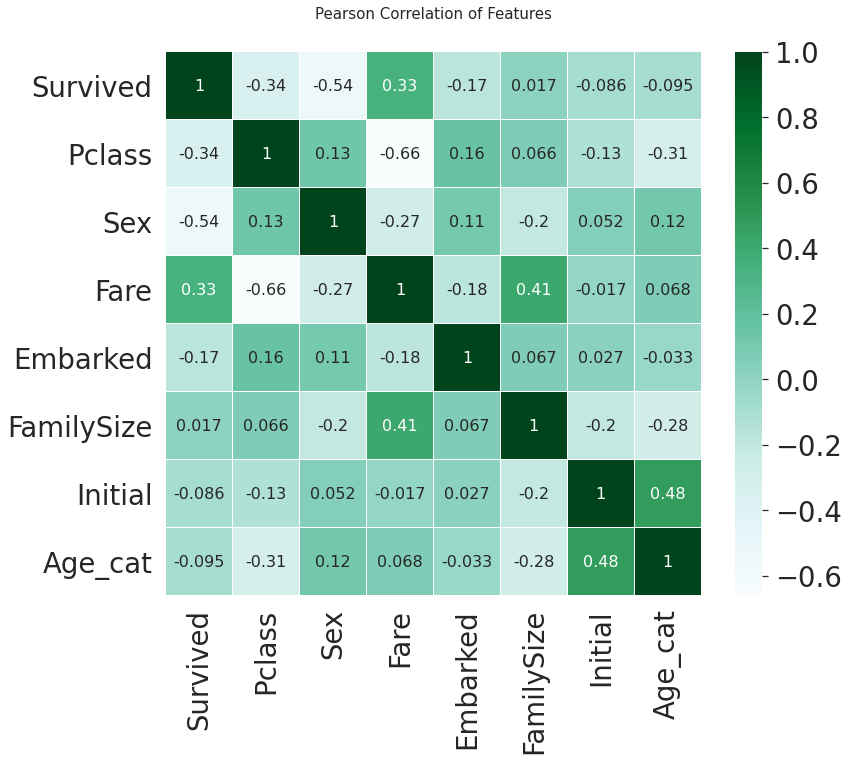

In [153]:
colormap=plt.cm.BuGn
plt.figure(figsize=(12,10))
plt.title('Pearson Correlation of Features',y=1.05 ,size=15)
sns.heatmap(heatmap_data.astype(float).corr(),linewidths=0.1,vmax=1.0,
           square=False,cmap=colormap,linecolor='white',annot=True, annot_kws={'size':16})

### Survived
- Pclass와 음의 상관관계가 큼
- Sex 와 음의 상관관계가 큼
- Fare와 양의 상관관계가 큼
- Embarked 와는 음의 상관관계가 약함
- FamilySize와는 양의 상관관계가 약함
- Initial 와는 음의 상관관계가 약함
- Age_cat 와는 음의 상관관계가 약함

### 알 수 있는 정보
- 서로 강한 상관관계를 가지는 feature들이 없다.
- 이것은 우리가 모델을 학습시킬 때, 불필요한 (redundatn,superfluous) feature가 없다는 것을 의미한다. 1 또는 -1 의 상관관계를 가진 feature A,B가 있다면 우리가 얻을 수 있는 정보는 사실 하나일 것이기 때문이다.

## 3.4 One-hot encoding on the Initial and Embarked
- 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델의 성능을 높이기 위해 one-hot encoding을 해준다.
- 수치화는 간단히 Master == 0, Miss == 1, Mr == 2, Mrs == 3, Other == 4 로 매핑해주는 것을 말한다,
- One-hot encoding 은 위 카테고리를 아래와 같이 (0, 1) 로 이루어진 5차원의 벡터로 나타내는 것을 말한다.

In [154]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [155]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0.683603,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,1.450832,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,0.727559,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,1.379314,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,0.735091,NaN,2,1,3,0,0,1,0,0


In [156]:
# Embarked에도 적용
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

## 3.5 Drop columns


In [157]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [158]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,0.683603,2,2,0,0,1,0,0,0,0,1
1,1,1,0,1.450832,2,3,0,0,0,1,0,1,0,0
2,1,3,0,0.727559,1,2,0,1,0,0,0,0,0,1
3,1,1,0,1.379314,2,3,0,0,0,1,0,0,0,1
4,0,3,1,0.735091,1,3,0,0,1,0,0,0,0,1


In [159]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,NaN,0,0,1,0,0,1,0
1,3,0,1.945910,2,NaN,0,0,0,1,0,0,1
2,2,1,2.270836,1,NaN,0,1,0,0,0,1,0
3,3,1,2.159003,1,3.0,0,0,0,1,0,0,1
4,3,0,2.508582,3,3.0,0,0,1,0,0,0,1


-  train 의 Survived feature(target class)를 빼면 train, test 둘다 같은 columns 를 가진 걸 확인할 수 있다.

- https://kaggle-kr.tistory.com/17?category=868316  튜토리얼1
- https://kaggle-kr.tistory.com/18?category=868316  튜토리얼2